In [2]:
import numpy as np
import matplotlib.pyplot as pt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D, proj3d

#### Ackley Function
The Ackley function is widely used for testing optimization algorithms. In its two-dimensional form, as shown in the plot below, it is characterized by a nearly flat outer region, and a large hole at the centre. The function poses a risk for optimization algorithms, particularly hillclimbing algorithms, to be trapped in one of its many local minima

In [3]:
def ackley_func_2_dimension(a, b, c, d):
        def ackley(X,Y):
                sum_sq_term = -a * np.exp(-b * np.sqrt((X*X + Y*Y)/2) )
                cos_term = -np.exp((np.cos(c*X) + np.cos(c*Y)) / 2)
                Z = a + np.exp(1) + sum_sq_term + cos_term
                return Z
        return ackley

#### Ackley Function in 2 dimensions with recommended Variable values

a=20,
b=0.2,
c=2π

In [4]:
ackley_2d=ackley_func_2_dimension(20,0.2,2*np.pi,2)

#### Plotting Ackley function

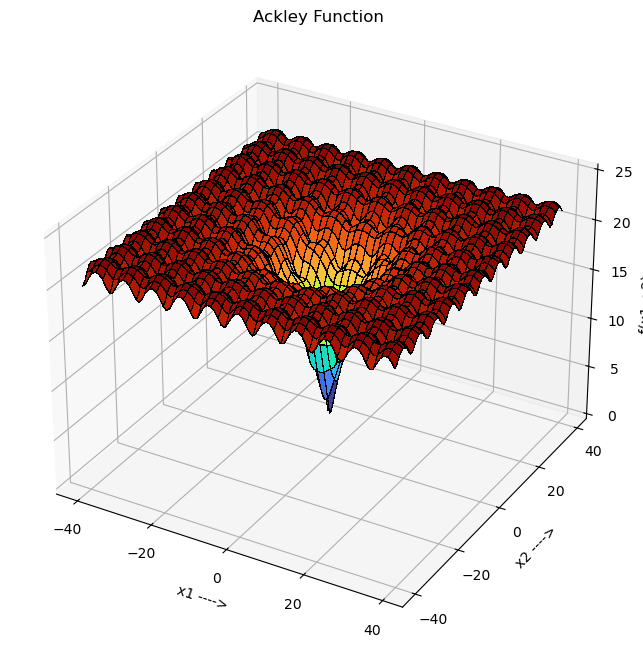

In [5]:
x=np.arange(-40,40,0.88)
y=np.arange(-40,40,0.88)
X,Y=np.meshgrid(x,y)
Z=ackley_2d(X,Y)


# Plot the surface
fig = pt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="turbo",edgecolor='k',linewidth=0.1, antialiased=False)


ax.set_xlabel('x1 ---->')
ax.set_ylabel('x2 ---->')
ax.set_zlabel('f(x1, x2) ---->')
ax.set_title('Ackley Function')

# Set x and y ticks
ax.set_xticks([-40, -20, 0, 20, 40])
ax.set_yticks([-40, -20, 0, 20, 40])

# Set grid
ax.set_zlim(0, 25)

# Set grid to dotted
ax.grid(True)

pt.show()

#### Contour Plot of Ackley Function

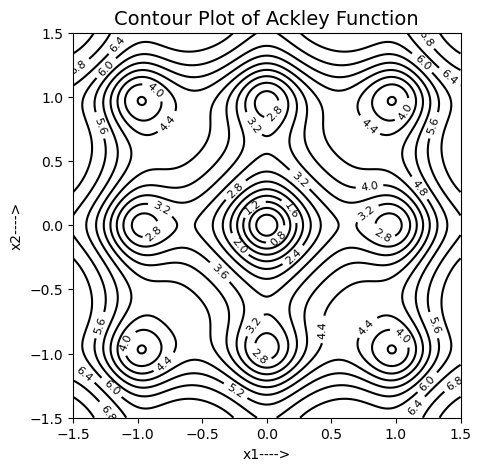

In [6]:
# Define the range of x and y values
x = np.linspace(-1.5, 1.5, 380)
y = np.linspace(-1.5, 1.5, 450)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the Ackley function values for each point in the grid
Z = ackley_2d(X, Y)

# Plot the contour plot with increased density of lines
pt.figure(figsize=(5, 5))
contour = pt.contour(X, Y, Z, levels=23, colors="Black")  # Set the number of levels to increase density
pt.xlabel('x1---->')
pt.ylabel('x2---->')
pt.title('Contour Plot of Ackley Function',size=14)
pt.clabel(contour, inline=True, fontsize=8)
pt.show()

#### Defining Numerical Gradient Function

In [7]:
def numericalGrad(funObj,w,epsilon):
    m=w.shape
    grad=np.zeros(m)
    for i in range(m[0]):
        wp=np.copy(w)
        wn=np.copy(w)
        wp[i] = w[i] + epsilon
        wn[i] = w[i] - epsilon
        grad[i] = (funObj(wp[0],wp[1])-funObj(wn[0],wn[1]))/(2*epsilon)
    return grad

Ques 1. (40 Marks) Implement the following algorithms (Compute gradients using theory or Nu-
merical Gradient) to minimize the function given below. You can use certain error toler-
ance/difference between xk+1 to xk to stop the gradient descent

1. GD with Momentum
2. Nesterov Accelerated Gradient Descent (NAG)
3. ADAGRAD
4. RMSPROP
5. ADAM with Bias
6. ADAM without Bias

Compare all of these methods with GD with fixed step size in terms of convergence
and number of iterations

### GD with Momentum (with different alpha and Betas)

In [8]:
def Gradient_Descent_Momentum(f, x, alpha,beta, steps=50):
    count = 0
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    v_k=np.zeros(x.shape)
    while count < steps:
        gradient = numericalGrad(f,x_k[-1], 0.00001)  # Compute gradient at the last element of x_k
        v_k_1=beta*v_k - alpha * gradient
        x_k_1 = x_k[-1] + v_k_1
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        v_k=v_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [9]:
start_points=np.array([[0.61,0.72],[0.61,0.72],[0.61,0.73],[0.62,0.75]])
alphas=[0.05,0.01,0.01,0.01]
gds=[]
for i in range(4):
    gds.append(Gradient_Descent_Momentum(ackley_2d,start_points[i],alphas[i],0.2))

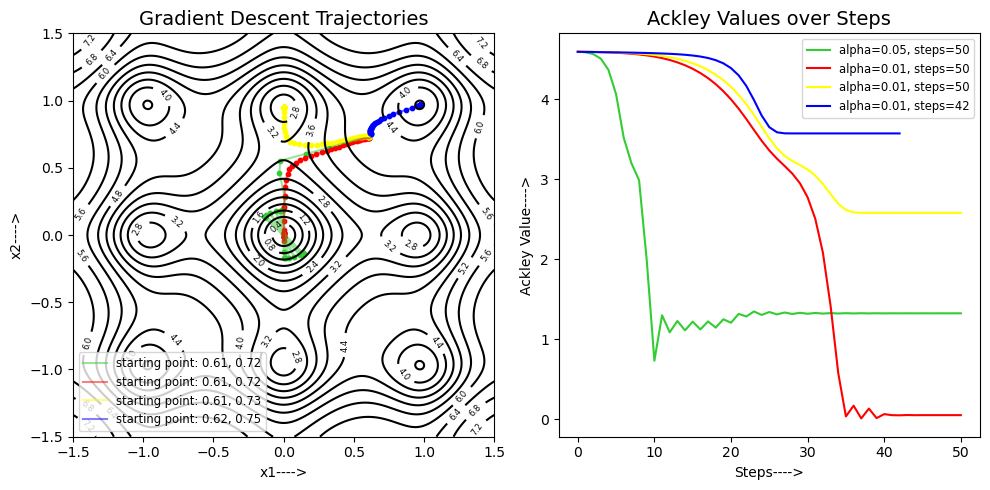

In [10]:
# Define the range of x and y values
x = np.linspace(-1.5, 1.5, 380)
y = np.linspace(-1.5, 1.5, 450)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the Ackley function values for each point in the grid
Z = ackley_2d(X, Y)

# Create subplots
fig, ax = pt.subplots(1, 2, figsize=(10, 5))

colors = ["limegreen", "red", "yellow", "blue"]
for i in range(4):
    ax[0].scatter(gds[i][:, 0], gds[i][:, 1], color=colors[i], s=10, marker='o')
    ax[0].plot(gds[i][:, 0], gds[i][:, 1], colors[i], label=f"starting point: {gds[i][0, 0]}, {gds[i][0, 1]}", alpha=0.5)
    z = ackley_2d(gds[i][:, 0], gds[i][:, 1])
    ax[1].plot(range(gds[i][:, 0].shape[0]), z,color=colors[i], label=f"alpha={alphas[i]}, steps={gds[i][:, 0].shape[0]-1}")

# Customize the plots
ax[0].set_xlabel('x1---->')
ax[0].set_ylabel('x2---->')
ax[0].legend(fontsize='small',loc="lower left")
ax[0].set_title('Gradient Descent Trajectories',size=14)

ax[1].set_xlabel('Steps---->')
ax[1].set_ylabel('Ackley Value---->')
ax[1].legend(fontsize='small',loc="upper right")
ax[1].set_title('Ackley Values over Steps',size=14)

# Plot the contour plot
contour = ax[0].contour(X, Y, Z, levels=20, colors="black")
ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')

# Show the plots
pt.tight_layout()
pt.show()

##### Gradient Descent with momentum povide earlier convergence and less zig zag behaviour in comparison to Gradient Descent but stuck at local minima is still there

### Nesterov Accelerated Gradient descent (NAG) with different alpha and Betas

In [13]:
def Nesterov_Accelerated_Gradient_Descent(f, x, alpha,beta, steps=50):
    count = 0
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    v_k=np.zeros(x.shape)
    while count < steps:
        gradient = numericalGrad(f,x_k[-1]+beta*v_k, 0.00001)  # Compute gradient at the last element of x_k
        v_k_1=beta*v_k - alpha * gradient
        x_k_1 = x_k[-1] + v_k_1
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        v_k=v_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [18]:
start_points=np.array([[0.61,0.72],[0.61,0.72],[0.61,0.73],[0.62,0.75]])
alphas=[0.03,0.01,0.01,0.01]
gds=[]
for i in range(4):
    gds.append(Nesterov_Accelerated_Gradient_Descent(ackley_2d,start_points[i],alphas[i],0.4))

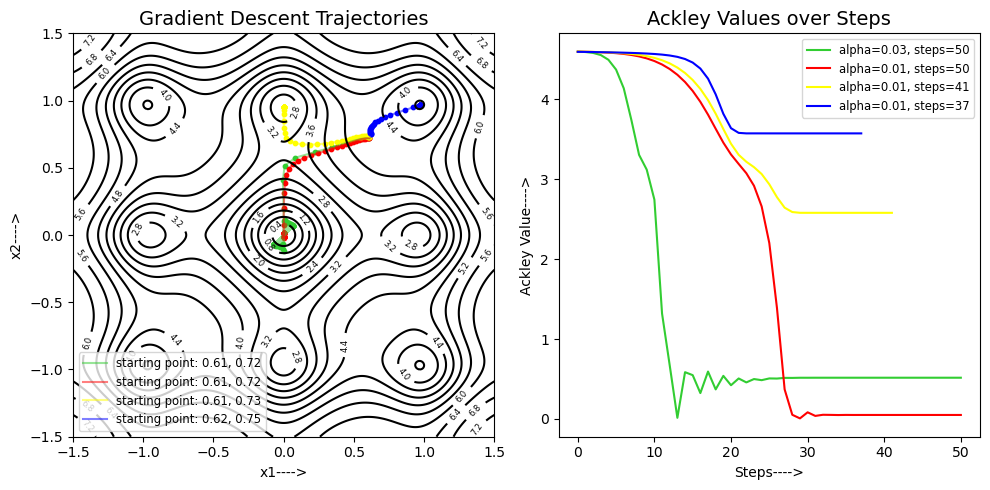

In [19]:
# Define the range of x and y values
x = np.linspace(-1.5, 1.5, 380)
y = np.linspace(-1.5, 1.5, 450)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the Ackley function values for each point in the grid
Z = ackley_2d(X, Y)

# Create subplots
fig, ax = pt.subplots(1, 2, figsize=(10, 5))

colors = ["limegreen", "red", "yellow", "blue"]
for i in range(4):
    ax[0].scatter(gds[i][:, 0], gds[i][:, 1], color=colors[i], s=10, marker='o')
    ax[0].plot(gds[i][:, 0], gds[i][:, 1], colors[i], label=f"starting point: {gds[i][0, 0]}, {gds[i][0, 1]}", alpha=0.5)
    z = ackley_2d(gds[i][:, 0], gds[i][:, 1])
    ax[1].plot(range(gds[i][:, 0].shape[0]), z,color=colors[i], label=f"alpha={alphas[i]}, steps={gds[i][:, 0].shape[0]-1}")

# Customize the plots
ax[0].set_xlabel('x1---->')
ax[0].set_ylabel('x2---->')
ax[0].legend(fontsize='small',loc="lower left")
ax[0].set_title('Gradient Descent Trajectories',size=14)

ax[1].set_xlabel('Steps---->')
ax[1].set_ylabel('Ackley Value---->')
ax[1].legend(fontsize='small',loc="upper right")
ax[1].set_title('Ackley Values over Steps',size=14)

# Plot the contour plot
contour = ax[0].contour(X, Y, Z, levels=20, colors="black")
ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')

# Show the plots
pt.tight_layout()
pt.show()

##### NAG provides even faster convergence than GD with Momentum but stuck at local minima is still there (we need to change alpha values for this)

## ADAGRAD

In [20]:
def ADAGRAD(f, x, alpha, steps=50):
    count = 0
    beta = 1e-7
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    r_k=np.zeros(x.shape)
    while count < steps:
        gradient = numericalGrad(f,x_k[-1], 0.00001)  # Compute gradient at the last element of x_k
        r_k_1=r_k + gradient * gradient
        x_k_1 = x_k[-1] - (alpha/(beta+np.sqrt(r_k_1)))*gradient
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        r_k=r_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [112]:
start_points=np.array([[0.61,0.72],[0.61,0.72],[0.61,0.73],[0.62,0.75]])
alphas=[0.7,0.7,0.7,0.7]
gds=[]
for i in range(4):
    gds.append(ADAGRAD(ackley_2d,start_points[i],alphas[i]))

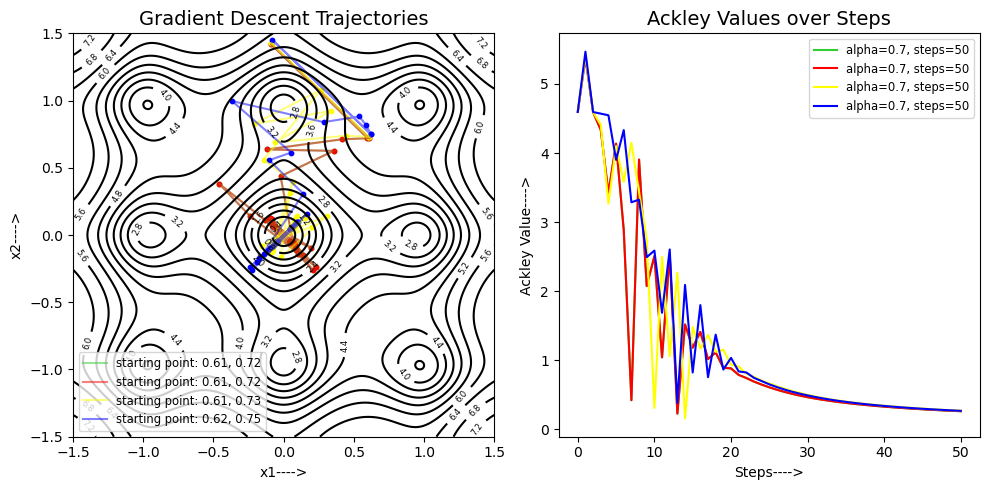

In [113]:
# Define the range of x and y values
x = np.linspace(-1.5, 1.5, 380)
y = np.linspace(-1.5, 1.5, 450)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the Ackley function values for each point in the grid
Z = ackley_2d(X, Y)

# Create subplots
fig, ax = pt.subplots(1, 2, figsize=(10, 5))

colors = ["limegreen", "red", "yellow", "blue"]
for i in range(4):
    ax[0].scatter(gds[i][:, 0], gds[i][:, 1], color=colors[i], s=10, marker='o')
    ax[0].plot(gds[i][:, 0], gds[i][:, 1], colors[i], label=f"starting point: {gds[i][0, 0]}, {gds[i][0, 1]}", alpha=0.5)
    z = ackley_2d(gds[i][:, 0], gds[i][:, 1])
    ax[1].plot(range(gds[i][:, 0].shape[0]), z,color=colors[i], label=f"alpha={alphas[i]}, steps={gds[i][:, 0].shape[0]-1}")

# Customize the plots
ax[0].set_xlabel('x1---->')
ax[0].set_ylabel('x2---->')
ax[0].legend(fontsize='small',loc="lower left")
ax[0].set_title('Gradient Descent Trajectories',size=14)

ax[1].set_xlabel('Steps---->')
ax[1].set_ylabel('Ackley Value---->')
ax[1].legend(fontsize='small',loc="upper right")
ax[1].set_title('Ackley Values over Steps',size=14)

# Plot the contour plot
contour = ax[0].contour(X, Y, Z, levels=20, colors="black")
ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')

# Show the plots
pt.tight_layout()
pt.show()

##### ADAGRAD perform worse than GD with momentum and NAG and requires high alpha values to converge to global minima and also show very much zig zag behaviour

## RMSPROP

In [29]:
def RMSPROP(f, x, alpha,rho, steps=50):
    count = 0
    beta = 1e-7
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    r_k=np.zeros(x.shape)
    while count < steps:
        gradient = numericalGrad(f,x_k[-1], 0.00001)  # Compute gradient at the last element of x_k
        r_k_1=rho*r_k + (1-rho) * gradient * gradient
        x_k_1 = x_k[-1] - (alpha/(beta+np.sqrt(r_k_1)))*gradient
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        r_k=r_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [100]:
start_points=np.array([[0.61,0.72],[0.61,0.72],[0.61,0.73],[0.62,0.75]])
alphas=[0.07,0.07,0.07,0.07]
gds=[]
for i in range(4):
    gds.append(RMSPROP(ackley_2d,start_points[i],alphas[i],0.99))

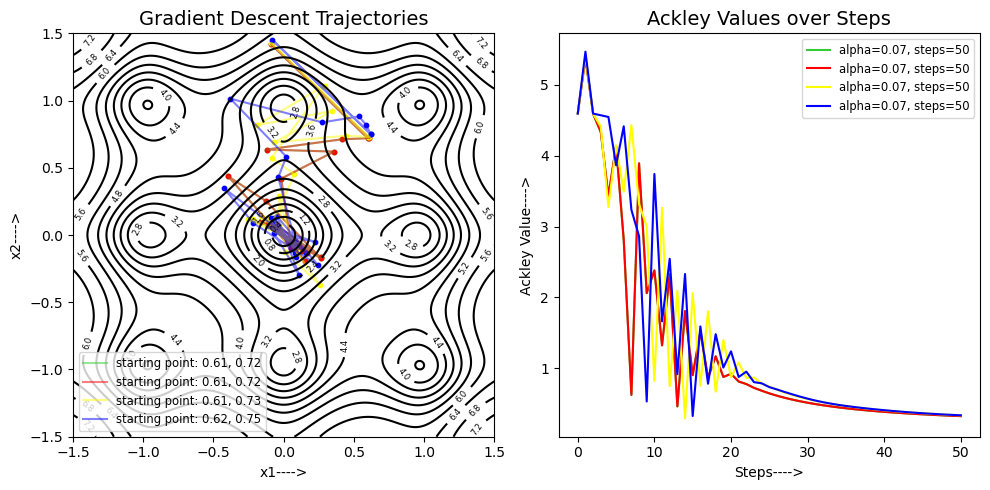

In [101]:
# Define the range of x and y values
x = np.linspace(-1.5, 1.5, 380)
y = np.linspace(-1.5, 1.5, 450)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the Ackley function values for each point in the grid
Z = ackley_2d(X, Y)

# Create subplots
fig, ax = pt.subplots(1, 2, figsize=(10, 5))

colors = ["limegreen", "red", "yellow", "blue"]
for i in range(4):
    ax[0].scatter(gds[i][:, 0], gds[i][:, 1], color=colors[i], s=10, marker='o')
    ax[0].plot(gds[i][:, 0], gds[i][:, 1], colors[i], label=f"starting point: {gds[i][0, 0]}, {gds[i][0, 1]}", alpha=0.5)
    z = ackley_2d(gds[i][:, 0], gds[i][:, 1])
    ax[1].plot(range(gds[i][:, 0].shape[0]), z,color=colors[i], label=f"alpha={alphas[i]}, steps={gds[i][:, 0].shape[0]-1}")

# Customize the plots
ax[0].set_xlabel('x1---->')
ax[0].set_ylabel('x2---->')
ax[0].legend(fontsize='small',loc="lower left")
ax[0].set_title('Gradient Descent Trajectories',size=14)

ax[1].set_xlabel('Steps---->')
ax[1].set_ylabel('Ackley Value---->')
ax[1].legend(fontsize='small',loc="upper right")
ax[1].set_title('Ackley Values over Steps',size=14)

# Plot the contour plot
contour = ax[0].contour(X, Y, Z, levels=20, colors="black")
ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')

# Show the plots
pt.tight_layout()
pt.show()

##### RMSPROP provide faster convergence compare to ADAGRAD but still have zig zag behaviour

## ADAM(without Bias)

In [15]:
def ADAM_without_Bias(f, x, alpha,beta_1=0.9,beta_2=0.999, steps=50):
    count = 0
    beta = 1e-3
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    r_k = np.zeros(x.shape)
    v_k = np.zeros(x.shape)
    while count < steps:
        gradient = numericalGrad(f,x_k[-1], 0.00001)  # Compute gradient at the last element of x_k
        v_k_1=beta_1*v_k+(1-beta_1)*gradient
        r_k_1=beta_2*r_k + (1-beta_2) * gradient * gradient
        x_k_1 = x_k[-1] - (alpha/(beta+np.sqrt(r_k_1)))*v_k_1
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        r_k=r_k_1
        v_k=v_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [20]:
start_points=np.array([[0.61,0.72],[0.61,0.72],[0.61,0.73],[0.62,0.75]])
alphas=[0.02,0.02,0.02,0.02]
gds=[]
for i in range(4):
    gds.append(ADAM_without_Bias(ackley_2d,start_points[i],alphas[i]))

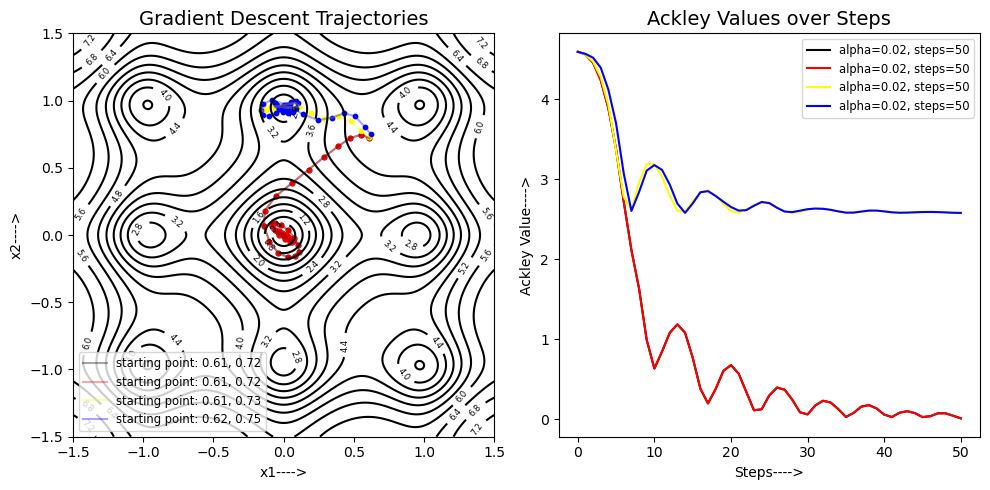

In [21]:
# Define the range of x and y values
x = np.linspace(-1.5, 1.5, 380)
y = np.linspace(-1.5, 1.5, 450)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the Ackley function values for each point in the grid
Z = ackley_2d(X, Y)

# Create subplots
fig, ax = pt.subplots(1, 2, figsize=(10, 5))

colors = ["black", "red", "yellow", "blue"]
for i in range(4):
    ax[0].scatter(gds[i][:, 0], gds[i][:, 1], color=colors[i], s=10, marker='o')
    ax[0].plot(gds[i][:, 0], gds[i][:, 1], colors[i], label=f"starting point: {gds[i][0, 0]}, {gds[i][0, 1]}", alpha=0.35)
    z = ackley_2d(gds[i][:, 0], gds[i][:, 1])
    ax[1].plot(range(gds[i][:, 0].shape[0]), z,color=colors[i], label=f"alpha={alphas[i]}, steps={gds[i][:, 0].shape[0]-1}")

# Customize the plots
ax[0].set_xlabel('x1---->')
ax[0].set_ylabel('x2---->')
ax[0].legend(fontsize='small',loc="lower left")
ax[0].set_title('Gradient Descent Trajectories',size=14)

ax[1].set_xlabel('Steps---->')
ax[1].set_ylabel('Ackley Value---->')
ax[1].legend(fontsize='small',loc="upper right")
ax[1].set_title('Ackley Values over Steps',size=14)

# Plot the contour plot
contour = ax[0].contour(X, Y, Z, levels=20, colors="black")
ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')

# Show the plots
pt.tight_layout()
pt.show()

#### ADAM performs better in case of convergence as well as in case of stuck at local minima

## ADAM(with Bias Correction)

In [61]:
def ADAM_with_Bias(f, x, alpha,beta_1=0.9,beta_2=0.999, steps=50):
    count = 0
    beta = 1e-3
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    r_k = np.zeros(x.shape)
    v_k = np.zeros(x.shape)
    t=1
    while count < steps:
        gradient = numericalGrad(f,x_k[-1], 0.00001)  # Compute gradient at the last element of x_k
        v_k_1=beta_1*v_k+(1-beta_1)*gradient
        r_k_1=beta_2*r_k + (1-beta_2) * gradient * gradient
        v_k_cap=v_k_1/(1-beta_1**t)
        r_k_cap=r_k_1/(1-beta_2**t)
        x_k_1 = x_k[-1] - (alpha/(beta+np.sqrt(r_k_cap)))*v_k_cap
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        r_k=r_k_1
        v_k=v_k_1
        t+=1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [70]:
start_points=np.array([[0.61,0.72],[0.61,0.72],[0.61,0.73],[0.62,0.75]])
alphas=[0.5,0.5,0.5,0.5]
gds=[]
for i in range(4):
    gds.append(ADAM_with_Bias(ackley_2d,start_points[i],alphas[i]))

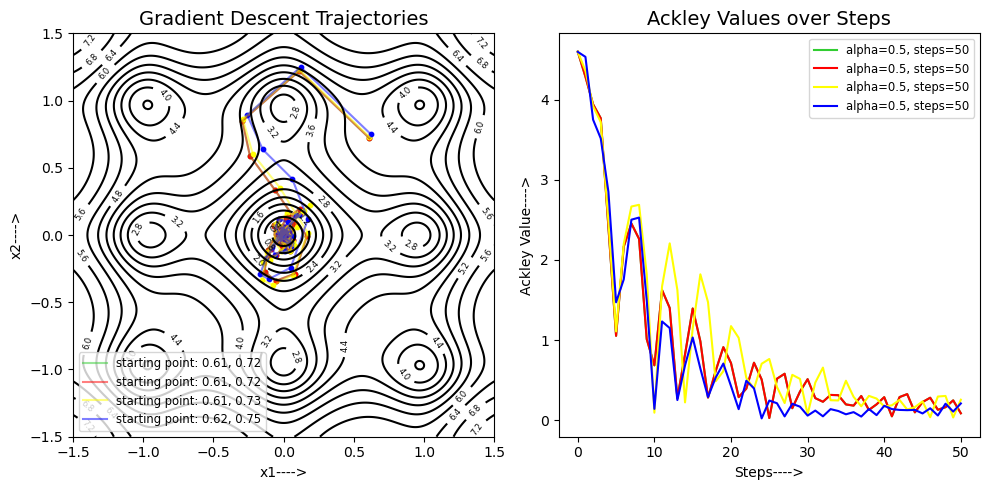

In [71]:
# Define the range of x and y values
x = np.linspace(-1.5, 1.5, 380)
y = np.linspace(-1.5, 1.5, 450)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the Ackley function values for each point in the grid
Z = ackley_2d(X, Y)

# Create subplots
fig, ax = pt.subplots(1, 2, figsize=(10, 5))

colors = ["limegreen", "red", "yellow", "blue"]
for i in range(4):
    ax[0].scatter(gds[i][:, 0], gds[i][:, 1], color=colors[i], s=10, marker='o')
    ax[0].plot(gds[i][:, 0], gds[i][:, 1], colors[i], label=f"starting point: {gds[i][0, 0]}, {gds[i][0, 1]}", alpha=0.5)
    z = ackley_2d(gds[i][:, 0], gds[i][:, 1])
    ax[1].plot(range(gds[i][:, 0].shape[0]), z,color=colors[i], label=f"alpha={alphas[i]}, steps={gds[i][:, 0].shape[0]-1}")

# Customize the plots
ax[0].set_xlabel('x1---->')
ax[0].set_ylabel('x2---->')
ax[0].legend(fontsize='small',loc="lower left")
ax[0].set_title('Gradient Descent Trajectories',size=14)

ax[1].set_xlabel('Steps---->')
ax[1].set_ylabel('Ackley Value---->')
ax[1].legend(fontsize='small',loc="upper right")
ax[1].set_title('Ackley Values over Steps',size=14)

# Plot the contour plot
contour = ax[0].contour(X, Y, Z, levels=20, colors="black")
ax[0].clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')

# Show the plots
pt.tight_layout()
pt.show()

#### ADAM with bias correction requires high alpha values and iterations to converge to global minima in comparison to ADAM without bias correction

#### ADAM shows more zig zag behaviour